# Прогноз оттока посетителей сети фитнес-центров

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

**Цель:** Провести анализ и подготовить план действий по удержанию клиентов.

**Задачи:**

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.
    
**Исходные данные:**
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Набор данных включает следующие поля:
- Данные клиента за предыдущий до проверки факта оттока месяц:
    - `gender` — пол;
    - `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
    - `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - `Phone` — наличие контактного телефона;
    - `Age` — возраст;
    - `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
    - `Group_visits` — факт посещения групповых занятий;
    - `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
    - `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
    - `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    - `Churn` — факт оттока в текущем месяце.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-файла-с-данными-и-изучение-общей-информации" data-toc-modified-id="Загрузка-файла-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка файла с данными и изучение общей информации</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-есть-ли-отсутствующие-признаки,-изучим-средние-значения-и-стандартные-отклонения" data-toc-modified-id="Посмотрим-есть-ли-отсутствующие-признаки,-изучим-средние-значения-и-стандартные-отклонения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим есть ли отсутствующие признаки, изучим средние значения и стандартные отклонения</a></span></li><li><span><a href="#Посмотрим-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался" data-toc-modified-id="Посмотрим-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался</a></span></li><li><span><a href="#Построим-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)" data-toc-modified-id="Построим-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</a></span></li><li><span><a href="#Построим-матрицу-корреляций-и-отобразим-её" data-toc-modified-id="Построим-матрицу-корреляций-и-отобразим-её-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Построим матрицу корреляций и отобразим её</a></span></li></ul></li><li><span><a href="#Построим-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Построим-модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построим модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Разобьём-данные-на-обучающую-и-валидационную-выборку:" data-toc-modified-id="Разобьём-данные-на-обучающую-и-валидационную-выборку:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разобьём данные на обучающую и валидационную выборку:</a></span></li><li><span><a href="#Стандартизируем-данные:" data-toc-modified-id="Стандартизируем-данные:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Стандартизируем данные:</a></span></li><li><span><a href="#Обучим-модель-на-train-выборке-двумя-способами:" data-toc-modified-id="Обучим-модель-на-train-выборке-двумя-способами:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучим модель на train-выборке двумя способами:</a></span></li><li><span><a href="#Оцениим-метрики-accuracy,-precision-и-recall-для-обеих-моделей-на-валидационной-выборке.-Сравним-по-ним-модели.-И-определим-какая-модель-показала-себя-лучше-на-основании-метрик?" data-toc-modified-id="Оцениим-метрики-accuracy,-precision-и-recall-для-обеих-моделей-на-валидационной-выборке.-Сравним-по-ним-модели.-И-определим-какая-модель-показала-себя-лучше-на-основании-метрик?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оцениим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. И определим какая модель показала себя лучше на основании метрик?</a></span></li></ul></li><li><span><a href="#Сделаем-кластеризацию-клиентов" data-toc-modified-id="Сделаем-кластеризацию-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сделаем кластеризацию клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизируем-данные:" data-toc-modified-id="Стандартизируем-данные:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стандартизируем данные:</a></span></li><li><span><a href="#Построим-матрицу-расстояний-на-стандартизованной-матрице-признаков-и-нарисуем-дендрограмму.-На-основании-полученного-графика-предположии,-какое-количество-кластеров-можно-выделить." data-toc-modified-id="Построим-матрицу-расстояний-на-стандартизованной-матрице-признаков-и-нарисуем-дендрограмму.-На-основании-полученного-графика-предположии,-какое-количество-кластеров-можно-выделить.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположии, какое количество кластеров можно выделить.</a></span></li><li><span><a href="#Обучим-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируем-кластеры-клиентов:" data-toc-modified-id="Обучим-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируем-кластеры-клиентов:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов:</a></span></li><li><span><a href="#Посмотрим-на-средние-значения-признаков-для-кластеров:" data-toc-modified-id="Посмотрим-на-средние-значения-признаков-для-кластеров:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Посмотрим на средние значения признаков для кластеров:</a></span></li><li><span><a href="#Построим-распределения-признаков-для-кластеров:" data-toc-modified-id="Построим-распределения-признаков-для-кластеров:-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Построим распределения признаков для кластеров:</a></span></li><li><span><a href="#Для-каждого-полученного-кластера-посчитаем-долю-оттока:" data-toc-modified-id="Для-каждого-полученного-кластера-посчитаем-долю-оттока:-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Для каждого полученного кластера посчитаем долю оттока:</a></span></li></ul></li><li><span><a href="#Сформулируем-выводы-и-сделаем-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Сформулируем-выводы-и-сделаем-базовые-рекомендации-по-работе-с-клиентами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами</a></span></li></ul></div>

In [1]:
# необходимые библиотеки для исследования

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools

# исключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

## Загрузка файла с данными и изучение общей информации

In [2]:
# загрузка файлa
df = pd.read_csv('/datasets/gym_churn.csv')

# первые 10 строк
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
# получение общей информации о данных в таблице df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# количество пропусков в столбцах

df.isna().sum() 

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [5]:
# проверяем наличие явных дубликатов

df.duplicated().sum() 

0

- В таблице 14 столбцов.
- В названии столбцов не соблюден стиль текста.
- Количество строк 4000.
- Пропусков нет.
- Дубликатов нет.
- Форматы данных - числовой (целые и вещественные).

In [6]:
# названия столбцов приведем к нижнему регистру

df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [8]:
# посмотрим на данные в столбце month_to_end_contract (срок до окончания текущего действующего абонемента (в месяцах))

df['month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

In [9]:
# в столбце month_to_end_contract заменим тип данных на целочисленный

df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

## Исследовательский анализ данных (EDA)

### Посмотрим есть ли отсутствующие признаки, изучим средние значения и стандартные отклонения

In [11]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Женщин и мужчин примерно одинаковое количество (обозначение пола: 0 и 1);
- БОльшая часть (около 85%) клиентов проживает или работает рядом с фитнес-центром;
- Почти половина клиентов являются сотрудниками компаний партнёпров;
- 30% клиентов первончально записались в фитнес-центр по акции "приведи друга";
- Контактые номера известны у 90% клиентов;
- Средняя длительность текущих действующих абонементов клиентов - 4-5 месяцев;
- Примерно 40% клиентов посещают групповые занятия;
- Средний возраст клиентов клиентов фитнес-центра - 29 лет;
- В среднем суммарная выручка от других услуг (массаж, кафе, спорт-товары) фитнес-центра на одного клиента - 147;
- Средний срок до окончания текущего действующего абонемента - 4 месяца с небольшим;
- Среднее время с момента первого обращения в фитнес-центр - около 4 месяцев (клуб недавно открылся?);
- Средняя частота посещений за все время с начала действия абонемента - 2 раза в неделю;
- Средняя частота посещений за последний месяц - чуть реже, но примерно также 2 раза в неделю;
- Факт оттока в текущем месяце - 27%, но довольно большое значение стандарного отклонения.

### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [12]:
# количество клиентов, которые ушли (1) и которые остались (0)

df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [13]:
mean_churn = df.groupby('churn').mean().T
mean_churn['part'] = mean_churn[0] / mean_churn[1]
mean_churn.round(2)

churn,0,1,part
gender,0.51,0.51,1.00
near_location,0.87,0.77,1.14
partner,0.53,0.36,1.50
promo_friends,0.35,0.18,1.92
phone,0.90,0.90,1.00
contract_period,5.75,1.73,3.32
group_visits,0.46,0.27,1.73
age,29.98,26.99,1.11
avg_additional_charges_total,158.45,115.08,1.38
month_to_end_contract,5.28,1.66,3.18


Сильные различия средних значений признаков в двух группах присутсвуют в длительности текущего абонемента. Пользователи, которые обладали абонементом в фитнес-центр всего-лишь 1 месяца, перестали ходить, а те, кто ходит в зал более 5 месяцев, остаются в строю. И в тоже время, влияет то, каков срок до окончания абонемента, "сливаются" те, у кого остается менее 2х месяцев занятий, и активны те клиенты, у которых осталось более 5 месяцев тренировок. Также, как и lifetime, чем раньше клиент стал посетителем фитнес-центра, тем меньше вероятность попасть в группу "оттока".

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

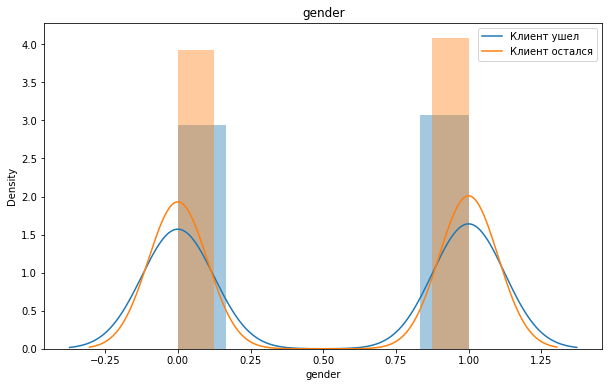

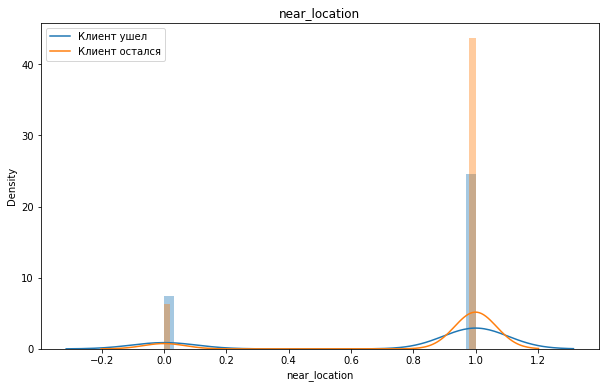

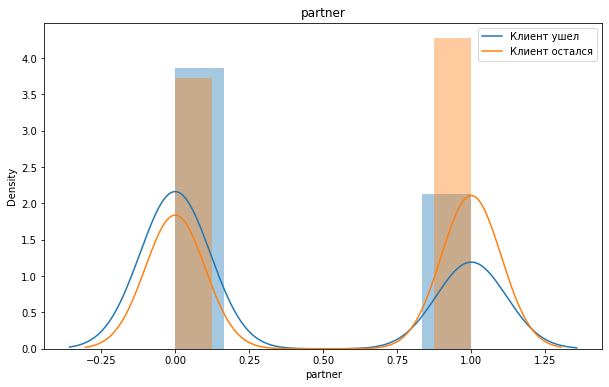

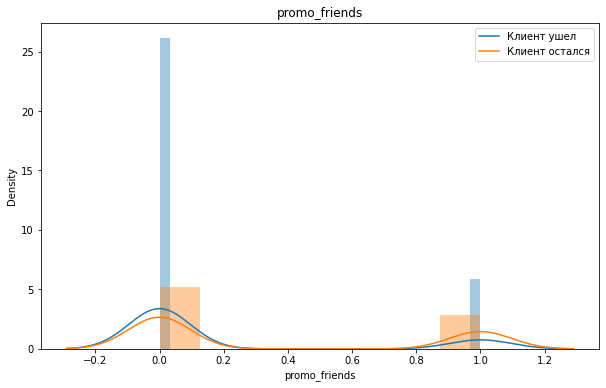

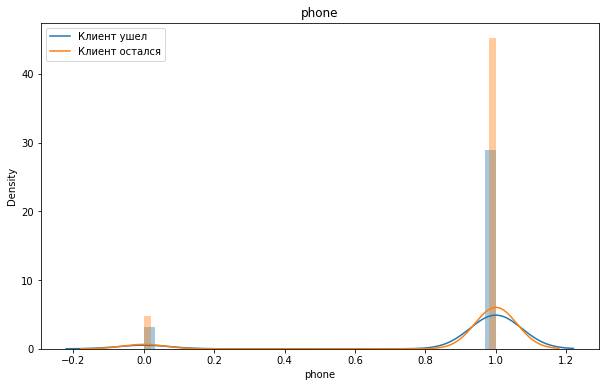

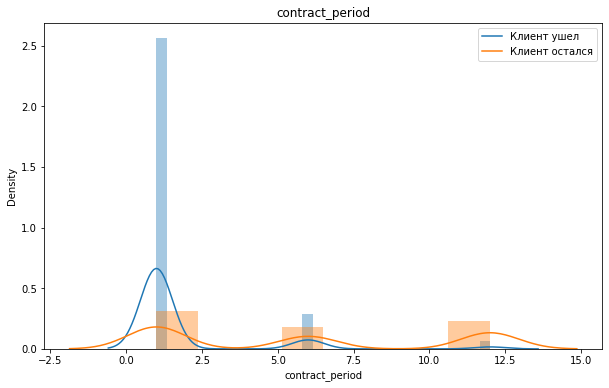

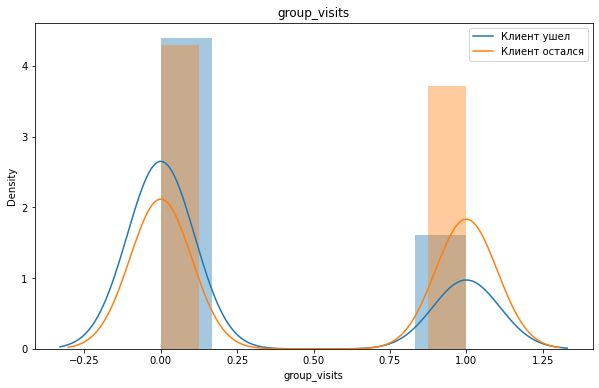

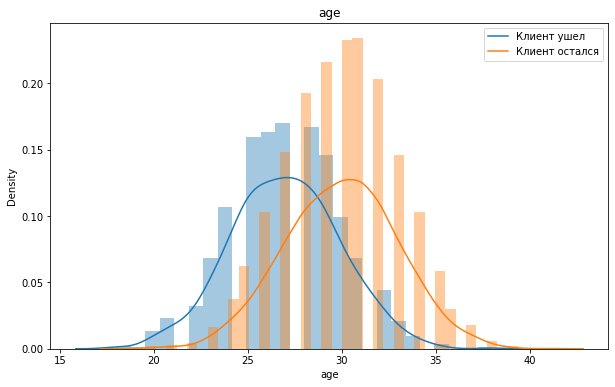

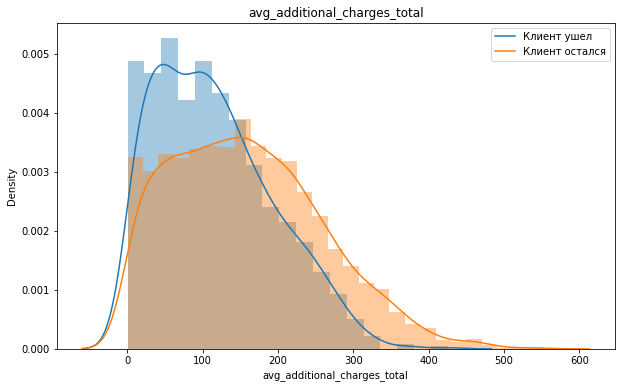

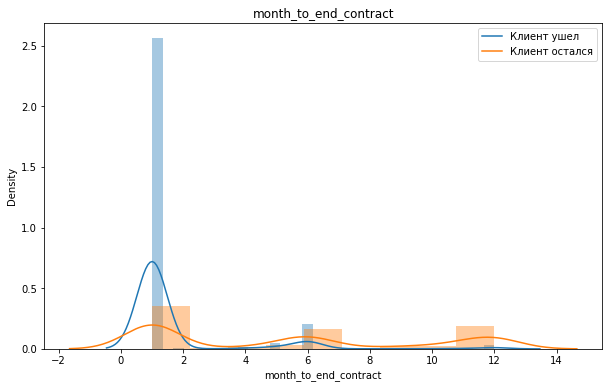

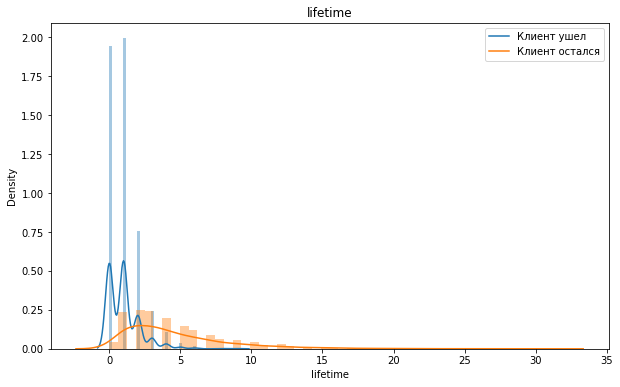

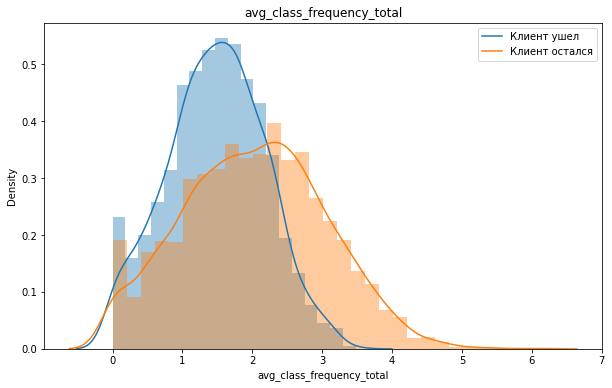

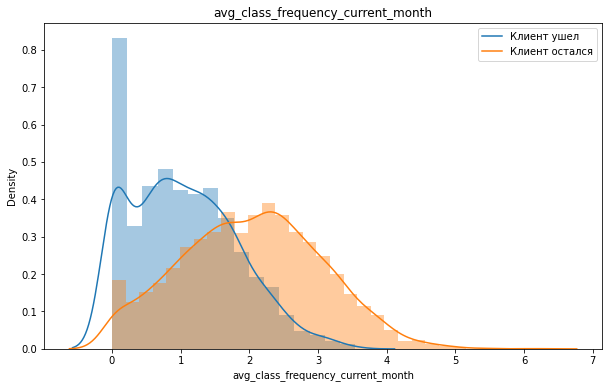

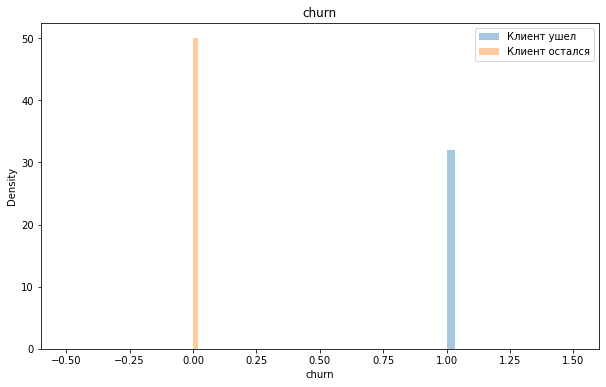

In [14]:
stayed = df[df['churn']==0] # клиенты, которые остались
left = df[df['churn']==1] # клиенты, которые ушли

for column in df.columns: 
    plt.figure(figsize=(10,6)) 
    plt.title(column)
    sns.distplot(left[column])
    sns.distplot(stayed[column])
    plt.legend(['Клиент ушел', 'Клиент остался'])
    plt.show()

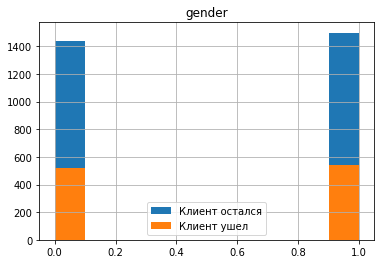

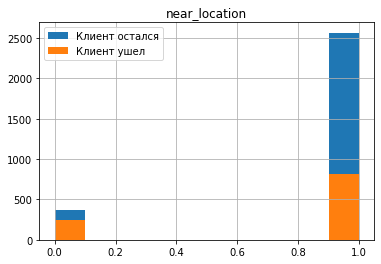

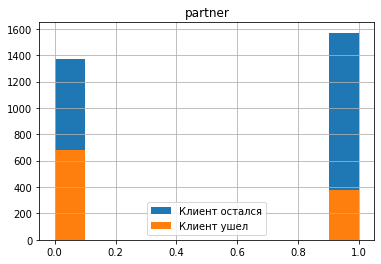

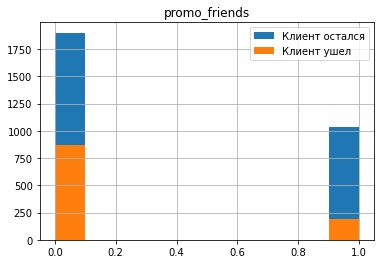

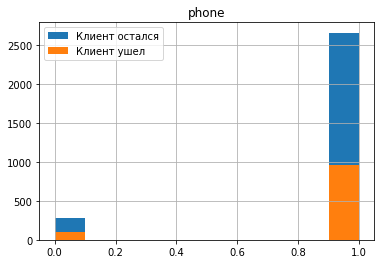

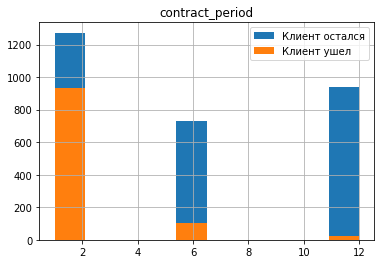

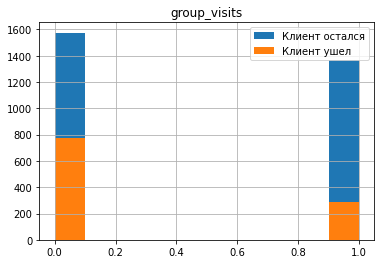

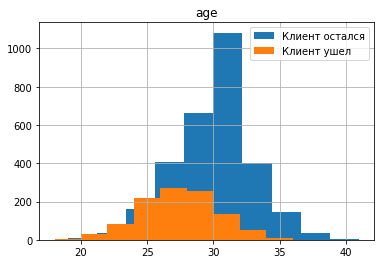

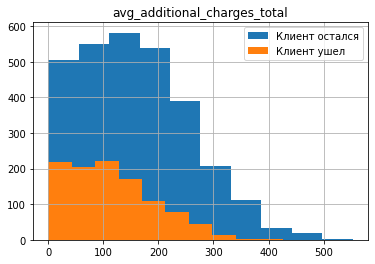

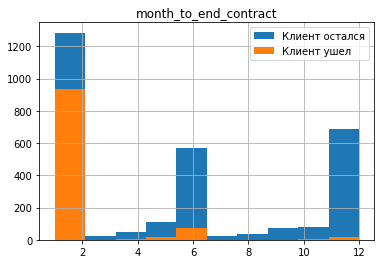

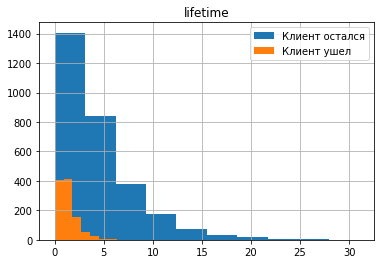

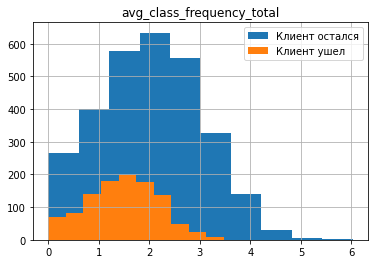

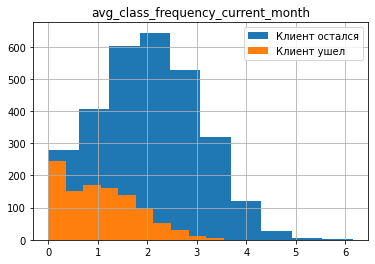

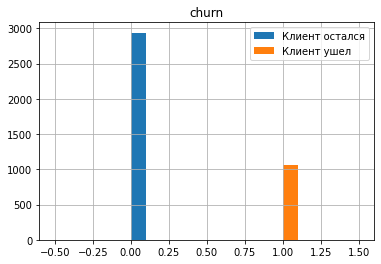

In [15]:
for column in df.columns:
    df.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Клиент остался', 'Клиент ушел'])
    plt.show()

Больше всег оклиентов попадает в отток, которые:
- Всего пару месяцев являются клиентами фитнес-центра, `lifetime`;
- Покупают абонемент не более, чем на 2 месяца, `contract_period` ;
- Срок до окончания текущего действующего абонемента в районе одного месяца, `month_to_end_contract`;
- Минимальное количество посещений (1-2 раза в неделю/месяц), `avg_class_frequency_total` и `avg_class_frequency_current_month`.

Гендер никак не влияет на отток. 

Лучше задерживаются те клиенты, которые являются сотрудниками компании-партнёра клуба, те, кто посещает групповые занятия, а также те, кто проживает или работает недалеко от фитнес-центра. Более отвественные клиенты в возрасте 30 лет.

### Построим матрицу корреляций и отобразим её


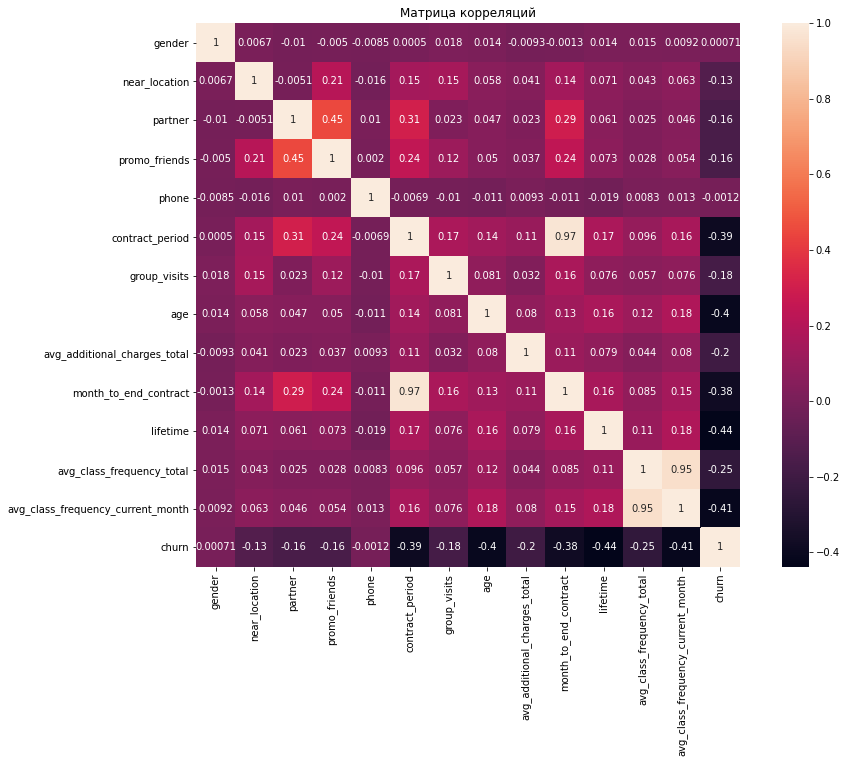

In [16]:
# вычисляем матрицу корреляций
cm = df.corr() 

#нарисуем тепловую карту с подписями для матрицы корреляций
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, square=True) 
plt.title('Матрица корреляций')
plt.show()

На матрице корреляции видим мультиколлинеарные признаки - `contract_period` и `month_to_end_contract`, а также `avg_class_frequency_current_month` и `avg_class_frequency_total`. 


Также, как и на графиках выше, мы видим:
- `phone` и `gender` никак не влияют на отток, почти нулевая корреляция с целевой переменной `churn`. 

На отток влияют: 
- время с момента первого обращения в фитнес-центр `lifetime`; 
- количество посещений в месяц `avg_class_frequency_current_month` и меньше взаимосвязи с посещеняими в неделю `avg_class_frequency_total`;
- длительность текущего действующего абонемента `contract_period`;
- cрок до окончания текущего действующего абонемента `month_to_end_contract`;
- возраст `age`.

А вот парнерские программы и приведи друга с целевой переменной почти не коррелируют.

In [17]:
# удалим один из двух признаков, которые сильно коррелируют между собой, оставляем contract_period и avg_class_frequency_current_month

df = df.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   lifetime                           4000 non-null   int64  
 10  avg_class_frequency_current_month  4000 non-null   float64
 11  churn                              4000 non-null   int64

## Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

### Разобьём данные на обучающую и валидационную выборку:


In [18]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(['churn'], axis=1)
y = df['churn']

# разделим выборку на обучающую и валидационную в соотношении 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Стандартизируем данные:

In [19]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

### Обучим модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.

In [20]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)

# обучим модель
lr_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [21]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

### Оцениим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. И определим какая модель показала себя лучше на основании метрик?


In [22]:
# определим функцию, которая будет выводить наши метрики

def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [23]:
# выведем все метрики для модели логистической регрессии

print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82


In [24]:
# выведем все метрики для модели случайного леса

print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75


Доля правильных ответов (Accuracy) в моделях одинакова. Точность и полнота (Precision и Recall) чуть больше в модели логистической регрессии. Следовательно, модель логистической регрессии показала себя лучше на основании метрик.

## Сделаем кластеризацию клиентов

### Стандартизируем данные:

In [25]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

### Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположии, какое количество кластеров можно выделить.

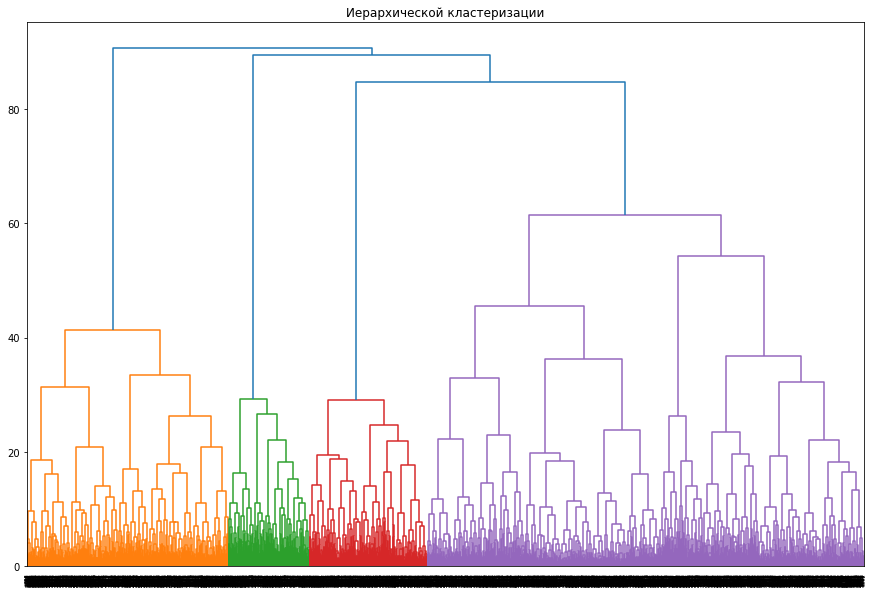

In [26]:
linked = linkage (x_sc, method = 'ward')

# в переменной linked сохранена таблица «связок» между объектами, визуализируем как дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархической кластеризации')
plt.show() 

Визуально можно выделить 4 кластера, далее по заданию число кластеров принимаем n=5.

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов:

In [27]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0) 

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster'] = labels

In [28]:
# определим количество клиентов в кластерах

df['cluster'].value_counts()

2    1064
3    1007
0     985
1     558
4     386
Name: cluster, dtype: int64

Самый многочисленный кластер под номером 2, в три раза меньше клиентов в группе номер 4.

### Посмотрим на средние значения признаков для кластеров:

In [29]:
# выведем статистику по средним значениям наших признаков по кластеру

df.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


- Группа под номером 0 - это те клиенты, которые являются сотрудниками компании-партнёра клуба,  и те, кто пришел по акции "приведи друга". 
- Группа под номером 1 - это те клиенты, которые живут или работают далеко от фитнес центра.
- Группа под номером 2 - это новые клиенты, которые совсем недавно ходят в зал и приносят меньше всего выручки от допуслуг, а также имеют большой процент оттока.
- Группа под номером 3 - это те клиенты, которые чаще посещают зал в месяц и дольше всего по времени, группа клиентов, где меньше всего оттока.
- Группа под номером 4 - это те клиенты, которые не оставили свой номер телефона.

Гендер и возраст не имеют значения.

### Построим распределения признаков для кластеров:

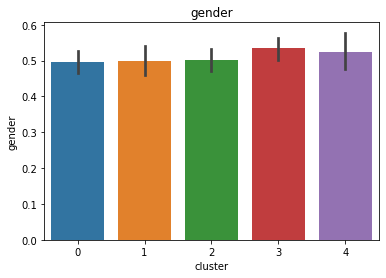

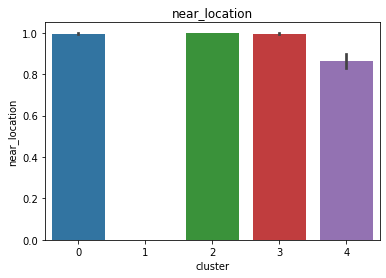

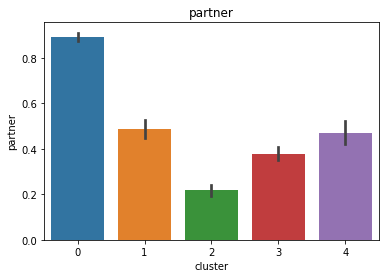

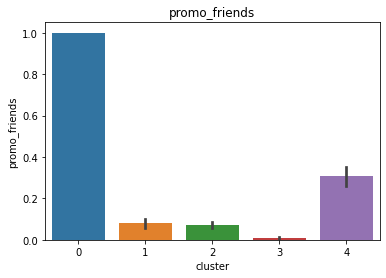

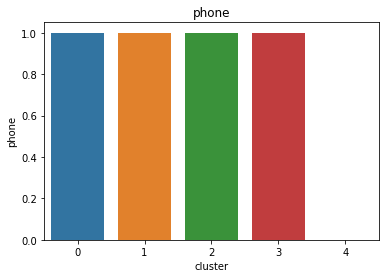

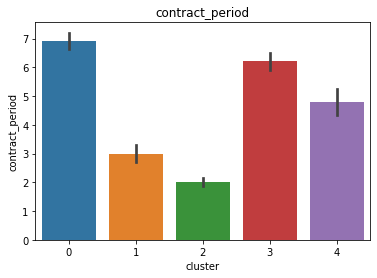

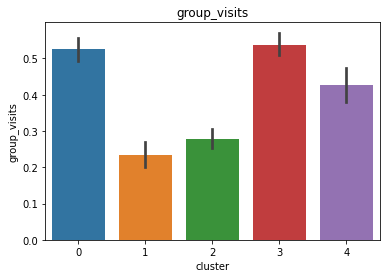

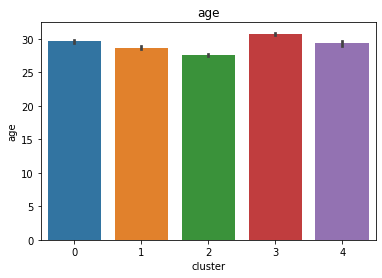

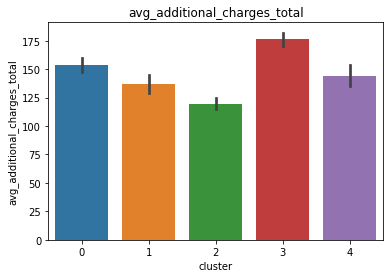

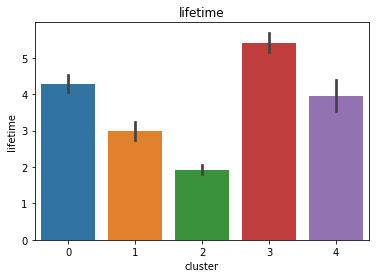

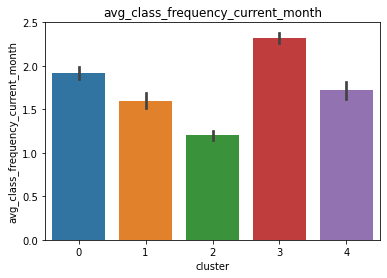

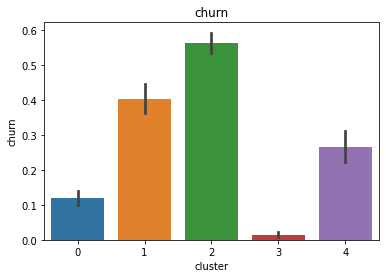

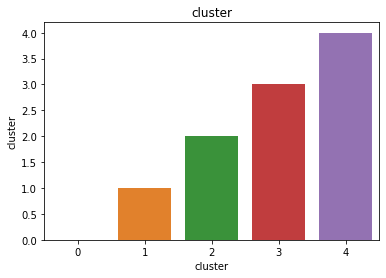

In [30]:
for column in df.columns:
    sns.barplot(x='cluster', y=column, data=df)
    plt.title(column)
    plt.show()

Также как и по средним значениям, на графиках видим:

- Группа под номером 0 - это те клиенты, которые являются сотрудниками компании-партнёра клуба,  и те, кто пришел по акции "приведи друга". 
- Группа под номером 1 - это те клиенты, которые живут или работают далеко от фитнес центра.
- Группа под номером 2 - это те клиенты, которые совсем недавно ходят в зал и приносят меньше всего выручки от допуслуг, а также имеют большой процент оттока.
- Группа под номером 3 - это те клиенты, которые чаще посещают зал в месяц и дольше всего по времени, группа клиентов, где меньше всего оттока.
- Группа под номером 4 - это те клиенты, которые не оставили свой номер телефона.

Гендер и возраст не имеют значения.

### Для каждого полученного кластера посчитаем долю оттока: 

In [31]:
# определим количество клиентов в кластерах

df['cluster'].value_counts()

2    1064
3    1007
0     985
1     558
4     386
Name: cluster, dtype: int64

In [32]:
(
    df.groupby('cluster').agg({'churn':'mean'})
    .sort_values(by='churn', ascending=False)
    .round(2)
)

,churn
cluster,
2,0.56
1,0.40
4,0.27
0,0.12
3,0.01


Как и заметили ранее, группа под номером 2 - это новые клиенты, которые совсем недавно ходят в зал и приносят меньше всего выручки от допуслуг, а также имеют большой процент оттока. А группа под номером 3 - это те клиенты, которые чаще посещают зал в месяц и дольше всего по времени, группа клиентов, где меньше всего оттока. Эти два кластера наиболее многочисленные.

##  Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами

**Выводы данным, полученным от заказчика:**
- Женщин и мужчин среди клиентов фитнес-фентра примерно одинаковое количество;
- БОльшая часть (около 85%) клиентов проживает или работает рядом с фитнес-центром;
- Почти половина клиентов являются сотрудниками компаний-партнёпров;
- 30% клиентов первончально записались в фитнес-центр по акции "приведи друга";
- Контактые номера известны у 90% клиентов;
- Средняя длительность текущих действующих абонементов клиентов - 4-5 месяцев;
- Примерно 40% клиентов посещают групповые занятия;
- Средний возраст клиентов клиентов фитнес-центра - 29 лет;
- В среднем суммарная выручка от других услуг (массаж, кафе, спорт-товары) фитнес-центра на одного клиента - 147;
- Средний срок до окончания текущего действующего абонемента - 4 месяца с небольшим;
- Среднее время с момента первого обращения в фитнес-центр - около 4 месяцев (клуб недавно открылся?);
- Средняя частота посещений за все время с начала действия абонемента - 2 раза в неделю;
- Средняя частота посещений за последний месяц - чуть реже, но примерно также 2 раза в неделю;
- Факт оттока в текущем месяце - 27%.

Сравнивая две группы клиентов: тех, что ушли и тех, что остались, можно заметить различия средних значений признаков в длительности текущего абонемента. Пользователи, которые обладали абонементом в фитнес-центр всего-лишь 1 месяца, перестали ходить, а те, кто ходит в зал более 5 месяцев, остаются в строю. И в тоже время, влияет то, каков срок до окончания абонемента, "сливаются" те, у кого остается менее 2х месяцев занятий, и активны те клиенты, у которых осталось более 5 месяцев тренировок. Также, как и lifetime, чем раньше клиент стал посетителем фитнес-центра, тем меньше вероятность попасть в группу "оттока".

**Проанализировали, какие клиенты чаще всего попадают в "отток":**

Больше всего клиентов попадает в отток, которые:

- Всего пару месяцев являются клиентами фитнес-центра, `lifetime`;
- Покупают абонемент не более, чем на 2 месяца, `contract_period` ;
- Срок до окончания текущего действующего абонемента в районе одного месяца, `month_to_end_contract`;
- Минимальное количество посещений (1-2 раза в неделю/месяц), `avg_class_frequency_total` и `avg_class_frequency_current_month`.

На отток влияют:

- время с момента первого обращения в фитнес-центр lifetime;
- количество посещений в месяц avg_class_frequency_current_month и меньше взаимосвязи с посещеняими в неделю avg_class_frequency_total;
- длительность текущего действующего абонемента contract_period;
- cрок до окончания текущего действующего абонемента month_to_end_contract;
- возраст age.

Гендер никак не влияет на отток. Лучше задерживаются те клиенты, которые являются сотрудниками компании-партнёра клуба, те, кто посещает групповые занятия, а также те, кто проживает или работает недалеко от фитнес-центра. Более отвественные клиенты в возрасте 30 лет.

**Разделили клиентов фитнес-центра на 5 кластеров:**

Группа под номером 0 - это те клиенты, которые являются сотрудниками компании-партнёра клуба, и те, кто пришел по акции "приведи друга".
Группа под номером 1 - это те клиенты, которые живут или работают далеко от фитнес центра.
Группа под номером 2 - это новые клиенты, которые совсем недавно ходят в зал и приносят меньше всего выручки от допуслуг, а также имеют большой процент оттока.
Группа под номером 3 - это те клиенты, которые чаще посещают зал в месяц и дольше всего по времени, группа клиентов, где меньше всего оттока.
Группа под номером 4 - это те клиенты, которые не оставили свой номер телефона.


- Кластер 0
    - Являются отрудниками компании-партнера клуба
    - Первоначальная запись в рамках акции "приведи друга"
    - Живут или работают в районе, где находится фитнес-центр
    - Самая большая длительность абонемента, в среднем 7 месяцев
    - Чаще всех посещают групповые занятия
    - Отток - 12%
    
- Кластер 1
    - Живут или работают далеко от фитнес-центр
    - Реже всех посещают групповые занятия
    - Небольшая длительность абонементы
    - Отток - 40%
- Кластер 2
    - Новые клиенты, lifetime 2 месяца
    - Минимальная длительность абонемента, в среднем 2 месяцев
    - Реже всех в месяц посещают фитнес центр 
    - Живут или работают в районе, где находится фитнес-центр
    - Реже всех посещают групповые занятия
    - Приносят меньше всего выручки от допуслуг
    - Отток - 56% - самый высокий
- Кластер 3
    - Постоянные клиенты, lifetime 5-6 месяцев в среднем
    - Большая длительность абонемента, в среднем 6 месяцев
    - Реже всех в месяц посещают фитнес центр 
    - Живут или работают в районе, где находится фитнес-центр
    - Чаще всех посещают групповые занятия
    - Приносят больше всего выручки от допуслуг
    - Первое посещение не по промокоду
    - Отток -1% - самый низкий
- Кластер 4
    - Не указали контактный номер
    - Остальные признаки все где-то посередине
    - Отток - 27%
    
**Рекомендации для стратегии взаимодействия с клиентами и их удержания:**
- В отток часто попадают новые клиенты, которые приобрели абонемент всего на пару месяцев. Они редко бывают в фитнес-центре, не посещают групповые занятия, видимо стоит чем-то замотивировать данных клиентов, например, бонусным предложением о продлении абонемента или же интересными групповыми программами: мастер-класс от известного тренера;
- Фитнес-центр редко посещают те клиенты, которые не живут и не работают рядом, стоит задуматься об открытии нового филиала или, например, предусмотреть услугу такси при покупке допуслуг;
- Lifetime влияет на выручку от других услуг фитнес-центра, стоит обратить внимание, как удерживать постоянных клиентов, например, делать приятные скидки и слать рассылки с благодарностями, что они - ваши дорогие клиенты;
- Проверять наличие контактных данных, чтобы все клиенты фитнес-центра своевременно получали полезные рассылки и предложения.